# Welcome to : Restaurant Sentiment Analysis  - in Depth of Classification Algorithms

### Objective : "The primary objective of this project is to explore the potential growth that can be achieved by applying sentiment analysis techniques and classification algorithms according to restaurant customer reviews."

### Source : Source : https://github.com/manthanpatel98/Restaurant-Review-Sentiment-Analysis/tree/master

In [1]:
# Library for Data Handling & Visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library for visualize & handling a missing datasets
import missingno as ms

# Library for interactive visualization
import plotly.graph_objects as go
import plotly.io as pio
pd.set_option('display.max_columns',None)

In [2]:
# Library for sklearn

import sklearn
from sklearn.svm import LinearSVC

# Train & Test Dataset
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score

# Library for Text Processing and Natural Language Toolkit (NLTK)

import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('stopwords')

# Library for Represent the frequent text in visual.
from wordcloud import WordCloud,STOPWORDS

# Library for Metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Library for Data Text

from sklearn.feature_extraction.text import TfidfVectorizer

# Library for Metrics Evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score, precision_score
from sklearn.preprocessing import LabelEncoder

# Warnings

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Load Dataset & Read Dataset


Preview :

1. Dataset of restaurant reviews with 10000 rows and 8 columns

2. Try to perform NLP by using the "Review" and "Rating columns"



In [3]:
data = pd.read_csv('Restaurant Reviews.csv')
data.head(10)

,Restaurant,Reviewer,Review,Restaurant Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
5,Beyond Flavours,Nagabhavani K,"Ambiance is good, service is good, food is aPr...",5,1 Review,5/24/2019 15:22,0
6,Beyond Flavours,Jamuna Bhuwalka,"Its a very nice place, ambience is different, ...",5,1 Review,5/24/2019 1:02,0
7,Beyond Flavours,Sandhya S,Well after reading so many reviews finally vis...,4,1 Review,5/23/2019 15:01,0
8,Beyond Flavours,Akash Thorat,"Excellent food , specially if you like spicy f...",5,"1 Review , 1 Follower",5/22/2019 23:12,0
9,Beyond Flavours,Smarak Patnaik,Came for the birthday treat of a close friend....,5,"1 Review , 1 Follower",5/22/2019 22:37,0


In [4]:
data.tail(10)

,Restaurant,Reviewer,Review,Restaurant Rating,Metadata,Time,Pictures
9990,Chinese Pavilion,Akram Ul Haq,Amazing food ! I always go here when I want Ch...,5,"3 Reviews , 128 Followers",6/16/2016 13:53,0
9991,Chinese Pavilion,Krishna Teja Ratnakaram,I was never a fan of Chinese food until I visi...,5,"9 Reviews , 54 Followers",6/15/2016 0:50,0
9992,Chinese Pavilion,Sujay Garg,I visited this restaurant with friends and was...,5,"4 Reviews , 1 Follower",6/15/2016 0:04,0
9993,Chinese Pavilion,Richard Rao,"Im going to cut to the chase, The food is exce...",5,"3 Reviews , 74 Followers",6/14/2016 18:35,0
9994,Chinese Pavilion,Shiladitya Chaudhury,Chinese Pavilion in Banjara HIlls was the firs...,1.5,"6 Reviews , 3 Followers",6/5/2016 10:49,0
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6


In [5]:
data.shape

(10000, 7)

**Description of columns in the file :**

1. Restaurant - Name of Restaurant
2. Reviewer - Name of the Reviewer
3. Review - Text of Review
4. Rating -  star ratings provide a quick summary,
understanding the nuances of a dining experience through written reviews
5. Metadata - A number of information related to the number of reviews has been created and followers
6. Time - Date & Time of Review has been created
7. Picture - Supporting Data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Restaurant         10000 non-null  object
 1   Reviewer           9962 non-null   object
 2   Review             9955 non-null   object
 3   Restaurant Rating  9962 non-null   object
 4   Metadata           9962 non-null   object
 5   Time               9962 non-null   object
 6   Pictures           10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


## Handling Missing Value & Duplicated Data

In [7]:
data.isna().sum()

Restaurant            0
Reviewer             38
Review               45
Restaurant Rating    38
Metadata             38
Time                 38
Pictures              0
dtype: int64

### Handling Duplicated Values

In [8]:
data.duplicated().sum()

36

In [9]:
data[data.duplicated(keep=False)].sort_values('Review').head(36)

,Restaurant,Reviewer,Review,Restaurant Rating,Metadata,Time,Pictures
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8781,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8782,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8783,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8784,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8785,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8786,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


Comment: There are 36 duplicate data in the dataset. Let's delete them

Mostly the duplicated data, review from American Wild Wings and Arena Eleven

In [10]:
# drop duplicated rows

data = data.drop_duplicates()

In [11]:
# sanity check

data.duplicated().sum()

0

In [12]:
data.isna().sum()

Restaurant           0
Reviewer             2
Review               9
Restaurant Rating    2
Metadata             2
Time                 2
Pictures             0
dtype: int64

### Handling Missing Value

In [13]:
# Fill the missing value with mode

data['Reviewer'].fillna(data['Reviewer'].mode()[0], inplace=True)

data['Review'].fillna(data['Review'].mode()[0], inplace=True)

data['Metadata'].fillna(data['Metadata'].mode()[0], inplace=True)

data.isna().sum()

Restaurant           0
Reviewer             0
Review               0
Restaurant Rating    2
Metadata             0
Time                 2
Pictures             0
dtype: int64

In [14]:
# Convert the rating to float

data['Restaurant Rating'] = pd.to_numeric(data['Restaurant Rating'], errors='coerce')

data['Restaurant Rating'] = data['Restaurant Rating'].astype(float)

# Fill the rating missing value with mean

data['Restaurant Rating'].fillna(data['Restaurant Rating'].mean(), inplace=True)


In [15]:
data.isna().sum()

Restaurant           0
Reviewer             0
Review               0
Restaurant Rating    0
Metadata             0
Time                 2
Pictures             0
dtype: int64

### Handling Time series

In [16]:
# Covert column "Time" to date_time
data['Time'] = pd.to_datetime(data['Time'])

# Fill the missing value with mean
mean_time = data['Time'].mean()
data['Time'].fillna(mean_time, inplace=True)


In [17]:
data.isna().sum()

Restaurant           0
Reviewer             0
Review               0
Restaurant Rating    0
Metadata             0
Time                 0
Pictures             0
dtype: int64

In [18]:
data.shape

(9964, 7)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9964 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Restaurant         9964 non-null   object        
 1   Reviewer           9964 non-null   object        
 2   Review             9964 non-null   object        
 3   Restaurant Rating  9964 non-null   float64       
 4   Metadata           9964 non-null   object        
 5   Time               9964 non-null   datetime64[ns]
 6   Pictures           9964 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 622.8+ KB


Comment : After dataset cleaning , contains of 9964 x 7 columns

## Data Understanding

In [ ]:
filtered_data = data[data['Restaurant'] == 'American Wild Wings']

filtered_data

,Restaurant,Reviewer,Review,Restaurant Rating,Metadata,Time,Pictures
8700,American Wild Wings,Karthik Sreeram,"found them on Zomato website, a very interesti...",5.000000,1 Review,2019-05-25 16:02:00.000000000,0
8701,American Wild Wings,Pushpendra Singh,Out of hunger and trust on the restaurant I or...,1.000000,"2 Reviews , 1 Follower",2019-05-25 05:21:00.000000000,1
8702,American Wild Wings,Harjeev Singh,I've ordered from this place a couple of times...,3.000000,"12 Reviews , 188 Followers",2019-05-22 20:06:00.000000000,0
8703,American Wild Wings,Kirthi Kirthi,Worst chicken popcorn had ever in my life.stra...,3.000000,"10 Reviews , 1 Follower",2019-05-22 17:04:00.000000000,0
8704,American Wild Wings,Ritwika Dash,So on my latest visit to this amazing American...,5.000000,"25 Reviews , 63 Followers",2019-05-22 13:02:00.000000000,7
...,...,...,...,...,...,...,...
8773,American Wild Wings,Lakshmi P,A small cute place to visit. Simple decor. Lov...,4.000000,"77 Reviews , 306 Followers",2018-10-17 14:42:00.000000000,4
8774,American Wild Wings,Rajini Kanth,Loved the wings!!!!😊 Great Environment With Gr...,5.000000,1 Review,2018-10-16 23:09:00.000000000,0
8775,American Wild Wings,Pramit Bandyopadhyay,I ordered the signature chicken wings through ...,4.000000,"11 Reviews , 1 Follower",2018-10-08 14:03:00.000000000,0
8776,American Wild Wings,Jyoshna Reddy,I had wings with Mexican Jerk...it tastes Deli...,5.000000,"2 Reviews , 166 Followers",2018-10-07 12:37:00.000000000,0


In [ ]:
filtered_data2 = data[data['Restaurant'] == 'Arena Eleven']

filtered_data2

,Restaurant,Reviewer,Review,Restaurant Rating,Metadata,Time,Pictures
9000,Arena Eleven,Navdeep Kohli,Located in midst of SLN terminus this place is...,4.000000,"92 Reviews , 493 Followers",2019-05-24 20:26:00.000000000,0
9001,Arena Eleven,N K KIRAN,"I HV been here yesterday for lunch, the hospit...",5.000000,1 Review,2019-05-23 11:20:00.000000000,0
9002,Arena Eleven,Neelanjana Jaswal,Great food and good ambience . Multiple screen...,5.000000,"1 Review , 1 Follower",2019-05-22 22:24:00.000000000,0
9003,Arena Eleven,Mohit,"The food, ambience, service everything was gre...",5.000000,3 Reviews,2019-05-22 22:19:00.000000000,0
9004,Arena Eleven,Lovely Deepu,It was beautiful ambience and view are awsome....,5.000000,"1 Review , 1 Follower",2019-05-22 22:00:00.000000000,0
...,...,...,...,...,...,...,...
9081,Arena Eleven,Satya,Grate buffet too good staters and music and se...,5.000000,"1 Review , 1 Follower",2019-03-05 14:21:00.000000000,0
9082,Arena Eleven,Srichandra Chilappagari,Went here on a Saturday night. Decent ambience...,3.000000,"49 Reviews , 66 Followers",2019-03-04 22:36:00.000000000,0
9083,Arena Eleven,CA Varsha Choudhary,Best place to hangout on weekdays as well as w...,5.000000,"1 Review , 6 Followers",2019-02-25 22:54:00.000000000,0
9084,Arena Eleven,Payal Puri,A perfect place to hang out with good service ...,5.000000,"18 Reviews , 7 Followers",2019-02-25 13:09:00.000000000,2


## Split Time (Deep Dive About Column Time - Specific : Time & Year)


In [ ]:
# Time Split - Manipulating (Time Series)
data['Date'] = data['Time'].dt.date

In [ ]:
data['Year'] = data['Time'].dt.year

In [ ]:
data['Timestamp'] = data['Time'].dt.time

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9964 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Restaurant         9964 non-null   object        
 1   Reviewer           9964 non-null   object        
 2   Review             9964 non-null   object        
 3   Restaurant Rating  9964 non-null   float64       
 4   Metadata           9964 non-null   object        
 5   Time               9964 non-null   datetime64[ns]
 6   Pictures           9964 non-null   int64         
 7   Date               9964 non-null   object        
 8   Year               9964 non-null   int64         
 9   Timestamp          9964 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 856.3+ KB


In [ ]:
review_year = data.groupby('Year').size()

review_year

Year
2016      43
2017     213
2018    4905
2019    4803
dtype: int64

In [ ]:
time = data['Timestamp'].value_counts().sort_index()

time.head(10)

00:00:00    14
00:01:00    10
00:02:00    10
00:03:00    11
00:04:00    11
00:05:00     2
00:06:00    10
00:07:00     6
00:08:00     9
00:09:00    20
Name: Timestamp, dtype: int64

## Statistic Descriptive

In [ ]:
# Splitting columns to a numeric and catagorical type

categorical_columns = [x for x in data.columns if data[x].dtype == np.dtype('object')]

numerical_columns   = [x for x in data.columns if x not in(categorical_columns)]

In [ ]:
# Numerical features

data[numerical_columns].describe()

,Restaurant Rating,Pictures,Year
count,9964.000000,9964.000000,9964.000000
mean,3.601044,0.751305,2018.452027
std,1.483238,2.574626,0.562474
min,1.000000,0.000000,2016.000000
25%,3.000000,0.000000,2018.000000
50%,4.000000,0.000000,2018.000000
75%,5.000000,0.000000,2019.000000
max,5.000000,64.000000,2019.000000


In [ ]:
# Categorical features

data[categorical_columns].describe()

,Restaurant,Reviewer,Review,Metadata,Date,Timestamp
count,9964,9964,9964,9964,9964,9964
unique,100,7446,9364,2477,647,1310
top,Beyond Flavours,Ankita,good,1 Review,2018-07-29,22:46:00
freq,100,15,246,921,97,28


From the table, it can be inferred that people generally write reviews during their leisure time rather than immediately after a meal. For instance, the fact that 1310 reviews were made at a time above the typical dinner hour, at 22:46:00

The first assumption, restaurants may not actively asking about reviews immediately after customers have finished their meals. This is supported by the fact that many reviews are written at times that are not directly associated with meal times.

The second assumption is that customers generally provide reviews more objectively when they are genuinely satisfied or dissatisfied. This implies that reviews are more likely to reflect honest and unbiased opinions when customers have had time to reflect on their dining experience rather than writing them immediately after a meal, which might be influenced by the immediate emotions experienced during the meal.

## Univariate Analysis

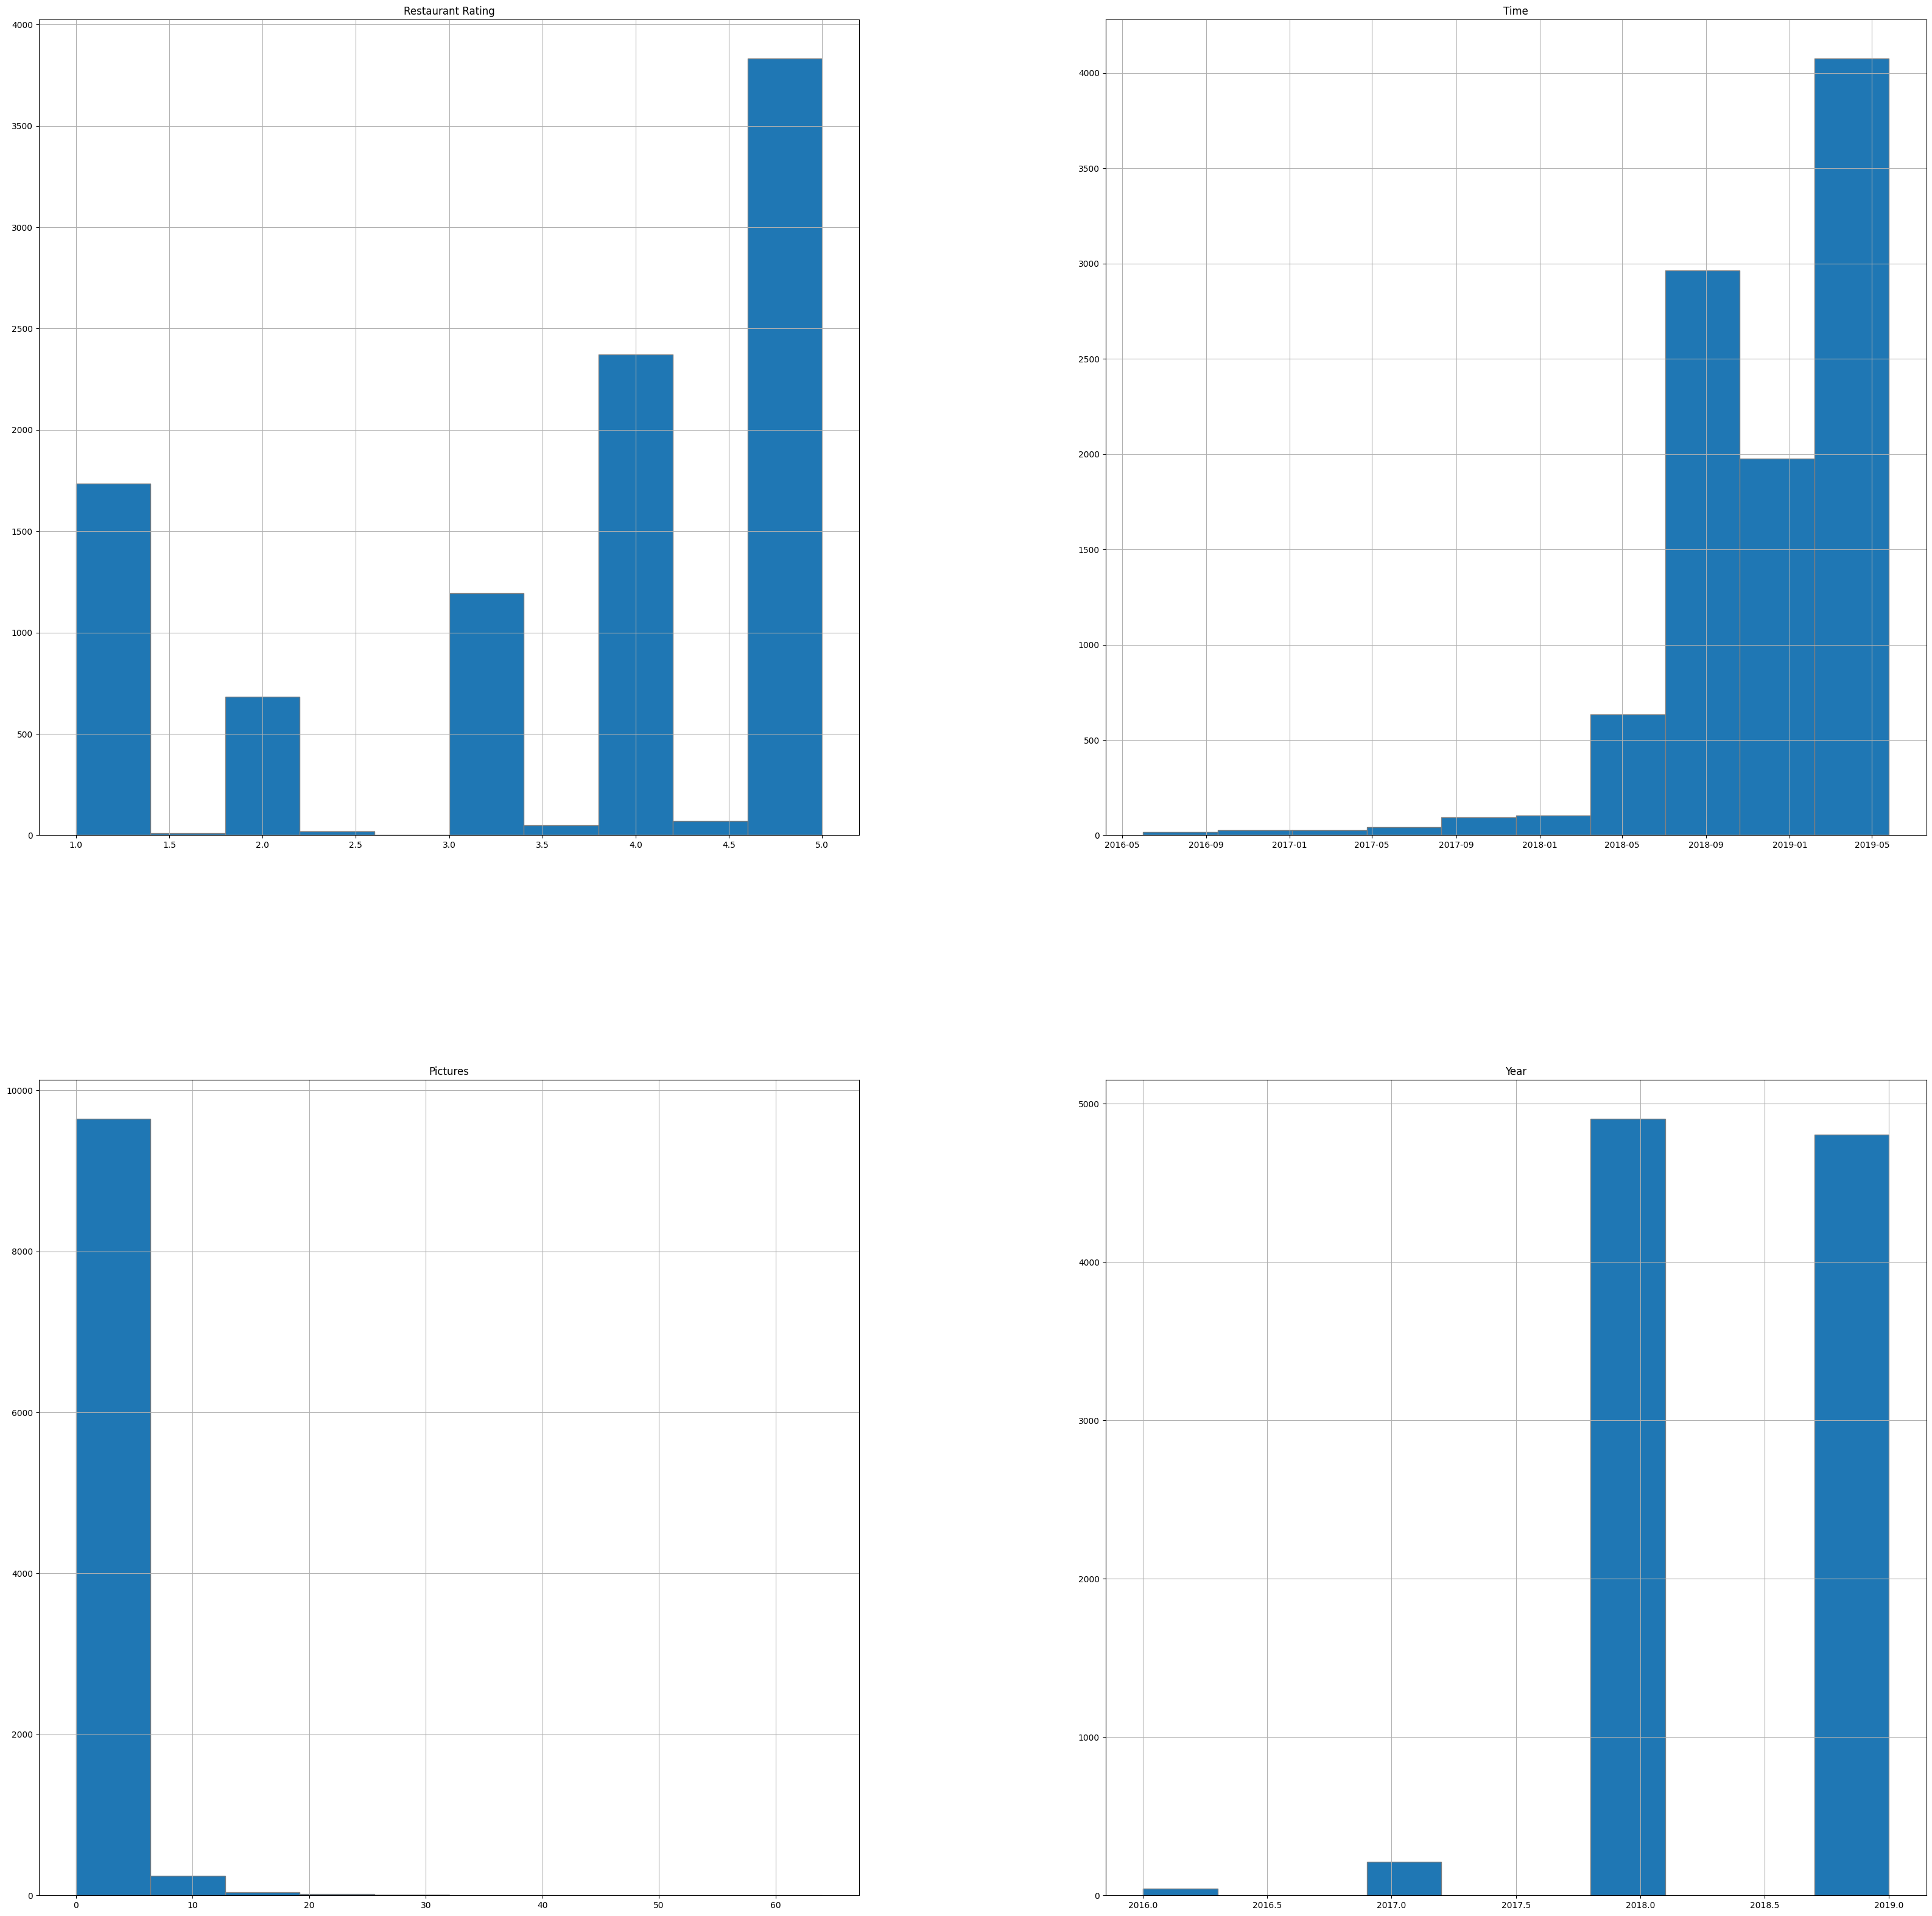

In [ ]:
data[numerical_columns].hist(figsize=(40,40), edgecolor='grey')
plt.show()

## DEEP DIVE EDA

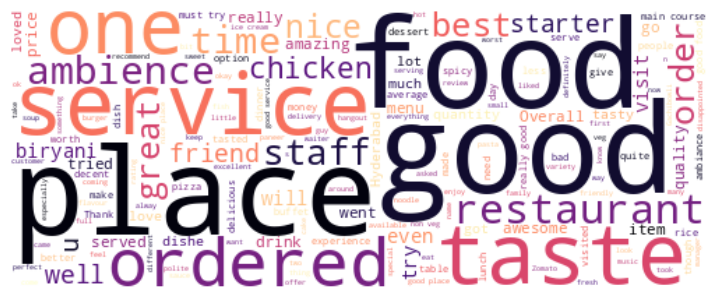

In [ ]:
from wordcloud import WordCloud, STOPWORDS

all_text_review = ' '.join(data['Review'])

wc_text_review = WordCloud(width = 500,
               height = 200,
               stopwords = STOPWORDS,
               background_color = 'white',
               colormap = 'magma',
               random_state = 42).generate(all_text_review)

plt.figure(figsize = (9,5))
plt.imshow(wc_text_review, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### Let's Check The Rating

In [ ]:
rating_check = data.groupby('Restaurant Rating',as_index=False).size().sort_values(['size'],ascending = False).reset_index(drop = True)

rating_check

,Restaurant Rating,size
0,5.000000,3832
1,4.000000,2373
2,1.000000,1735
3,3.000000,1193
4,2.000000,684
5,4.500000,69
6,3.500000,47
7,2.500000,19
8,1.500000,9
9,3.601044,3


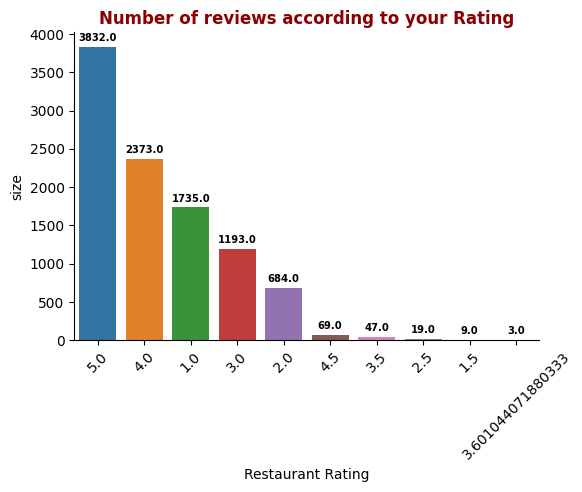

In [ ]:
fig,ax = plt.subplots(figsize = (6,4))
rects = sns.barplot(
    y=rating_check['size'],
    x=rating_check['Restaurant Rating'], order = rating_check['Restaurant Rating'], ax = ax
)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add the values above the bars
for rect in rects.patches:
    height = rect.get_height()
    ax.annotate(f'{height}', (rect.get_x() + rect.get_width() / 2, height-2),
                xytext=(0, 3),
                textcoords="offset points",
                size = 7.2,
                ha='center',
                va='bottom',
                weight = 'bold')

ax.set_title('Number of reviews according to your Rating', fontsize = 12, fontweight = 'bold', color = 'darkred')
plt.xticks(rotation=45)
fig.show()


### Comment : I taught that the following number of 4.5, 3.5, 2.5, 1.5 and 3.6 only a few. So we convert into "integer" more simple to be easy polarized.

In [20]:
data['Restaurant Rating'] = data['Restaurant Rating'].astype(int)

In [21]:
rating_counts = data.groupby('Restaurant Rating',as_index=False).size().sort_values(['size'],ascending = False).reset_index(drop = True)

rating_counts

,Restaurant Rating,size
0,5,3832
1,4,2442
2,1,1744
3,3,1243
4,2,703


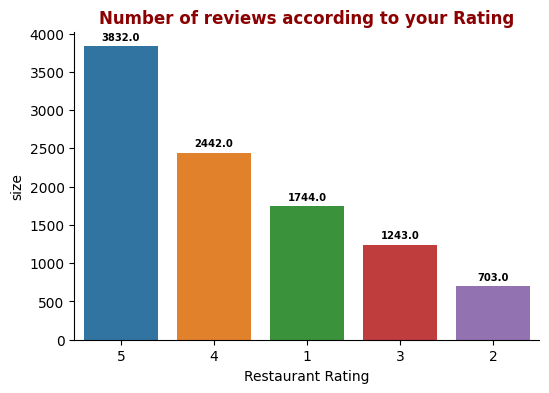

In [ ]:
fig,ax = plt.subplots(figsize = (6,4))
rects = sns.barplot(
    y=rating_counts['size'],
    x=rating_counts['Restaurant Rating'], order = rating_counts['Restaurant Rating'], ax = ax
)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add the values above the bars
for rect in rects.patches:
    height = rect.get_height()
    ax.annotate(f'{height}', (rect.get_x() + rect.get_width() / 2, height-2),
                xytext=(0, 3),
                textcoords="offset points",
                size = 7.2,
                ha='center',
                va='bottom',
                weight = 'bold')

ax.set_title('Number of reviews according to your Rating', fontsize = 12, fontweight = 'bold', color = 'darkred')
plt.xticks(rotation=0)
fig.show()

comment : rating '1' indicated low level satisfaction, shows very high. This is very worrying. After the project implementation, negative review that generate the rating '1' should be segmented quickly and handle by resto management.

## How "METADATA" & "REVIEWER"

In [ ]:
find_frequent_reviewer = data.groupby(['Reviewer', 'Metadata'], as_index=True).size().reset_index(name='size').sort_values(by='size', ascending=False).reset_index(drop=True)

find_frequent_reviewer.head(50)

,Reviewer,Metadata,size
0,Parijat Ray,"146 Reviews , 333 Followers",13
1,Jay Mehta,"46 Reviews , 43 Followers",11
2,Vedant Killa,"86 Reviews , 216 Followers",11
3,Siva Kumar,"84 Reviews , 183 Followers",10
4,Age Of Foodies (Suraj Karambe),"104 Reviews , 334 Followers",10
5,Manojkumar D Nambisan,"29 Reviews , 11 Followers",10
6,Anusha Sinha,"42 Reviews , 49 Followers",9
7,Prachita Jayaswal,"104 Reviews , 531 Followers",9
8,Prasun Gokhlani,"25 Reviews , 5 Followers",9
9,Nillu,"17 Reviews , 9 Followers",9


In [ ]:
find_frequent_reviewer = data.groupby(['Reviewer'], as_index=True).size().reset_index(name='size').sort_values(by='size', ascending=False).reset_index(drop=True)

find_frequent_reviewer.head(10)

,Reviewer,size
0,Ankita,15
1,Parijat Ray,13
2,Kiran,12
3,Vedant Killa,11
4,Jay Mehta,11
5,Priyanka,10
6,Siva Kumar,10
7,Age Of Foodies (Suraj Karambe),10
8,Manojkumar D Nambisan,10
9,Sravani,10


Comment : Review is one of the strategic campaign, the best way to attract new guests and managing a positive brand. "Because of, customers trust other customers." Gathering customer reviews on a regular basis, responding to those reviews, and ensuring a steady high ranking are the key elements of professional restaurant reputation management.

## Popularity Index Ranking

How popular a restaurant is compared to other restaurants

In [ ]:
# Find the restaurant having Rating 5-Star
top_restaurants = data[data['Restaurant Rating'] == 5]

# sort by "Rating"
top_restaurants_sorted = top_restaurants.sort_values(by='Restaurant Rating', ascending=True)
restaurant_counting = top_restaurants_sorted['Restaurant'].value_counts()

# Shows the TOP Restaurant
TOP_restaurants = restaurant_counting.head(10)

print(TOP_restaurants)

AB's - Absolute Barbecues          93
3B's - Buddies, Bar & Barbecue     91
B-Dubs                             88
Flechazo                           83
Paradise                           80
The Indi Grill                     71
Beyond Flavours                    66
Prism Club & Kitchen               62
Over The Moon Brew Company         60
Zega - Sheraton Hyderabad Hotel    60
Name: Restaurant, dtype: int64


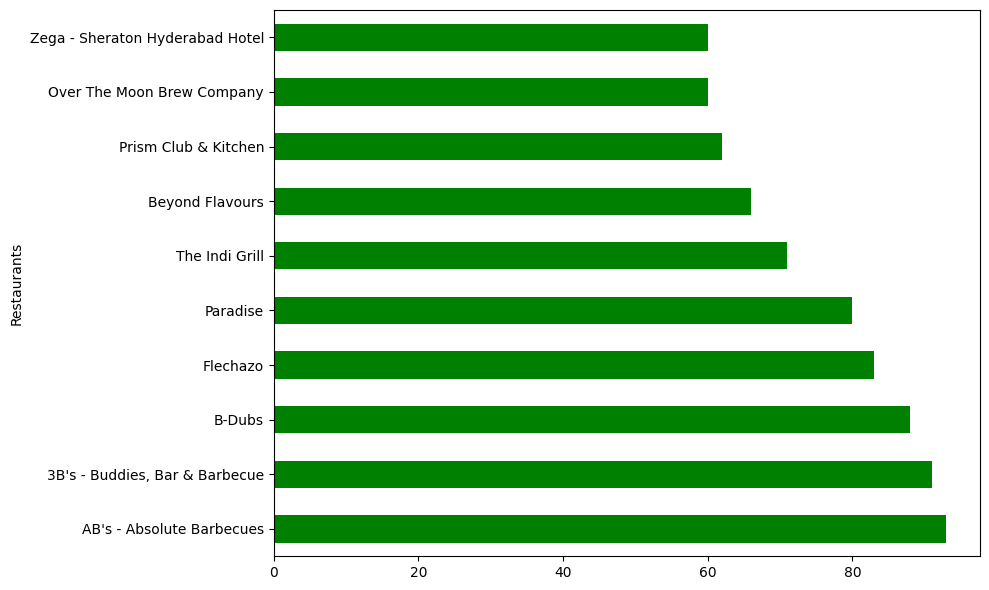

In [ ]:
plt.figure(figsize=(10, 6))
TOP_restaurants.plot(kind='barh', color=['green'])
plt.ylabel('Restaurants')
plt.tight_layout()

# shows the charts
plt.show()

In [ ]:
# Find the restaurant having Rating 4-Star
good_restaurants = data[data['Restaurant Rating'] == 4]

# sort by "Rating"
good_restaurants_sorted = good_restaurants.sort_values(by='Restaurant Rating', ascending=True)
restaurant_count = good_restaurants_sorted['Restaurant'].value_counts()

# Shows the GOOD Restaurant
GOOD_restaurants = restaurant_count.head(10)

print(GOOD_restaurants)

10 Downing Street                49
Driven Cafe                      49
Karachi Cafe                     45
The Old Madras Baking Company    43
Chinese Pavilion                 42
Deli 9 Bistro                    41
The Lal Street - Bar Exchange    41
Labonel                          41
Gal Punjab Di                    40
Cafe Eclat                       39
Name: Restaurant, dtype: int64


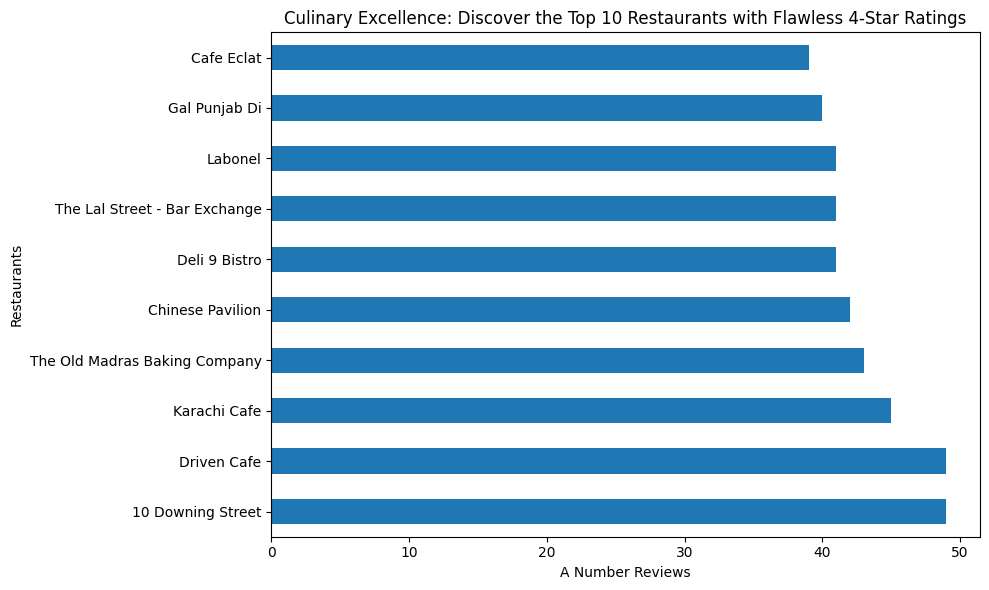

In [ ]:
plt.figure(figsize=(10, 6))
GOOD_restaurants.plot(kind='barh')
plt.title('Culinary Excellence: Discover the Top 10 Restaurants with Flawless 4-Star Ratings')
plt.xlabel('A Number Reviews')
plt.ylabel('Restaurants')
plt.tight_layout()

# Shows the charts
plt.show()


In [ ]:
# Find the restaurant having Rating 3-Star
restaurants = data[data['Restaurant Rating'] == 3]

# sort by "Rating"
restaurants_sorted = restaurants.sort_values(by='Restaurant Rating', ascending=True)
restaurant_x = restaurants_sorted['Restaurant'].value_counts()

# Shows the Restaurant
view_restaurants = restaurant_x.head(10)

print(view_restaurants)

Al Saba Restaurant    24
Chinese Pavilion      23
SKYHY                 22
Frio Bistro           22
Dunkin' Donuts        21
Diners Pavilion       20
The Chocolate Room    20
Pakwaan Grand         20
Driven Cafe           20
Pot Pourri            20
Name: Restaurant, dtype: int64


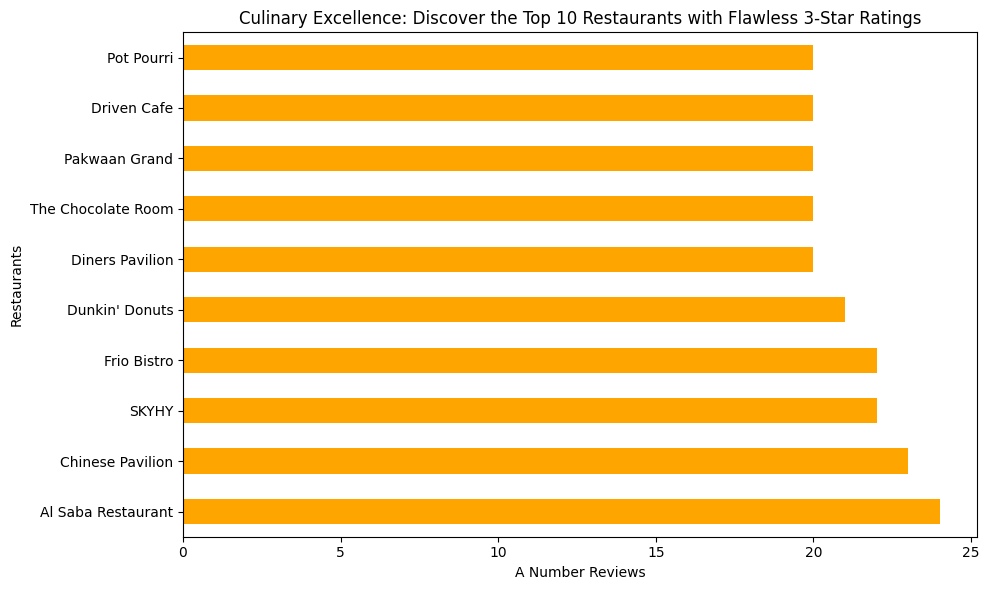

In [ ]:
plt.figure(figsize=(10, 6))
view_restaurants.plot(kind='barh', color = 'orange')
plt.title('Culinary Excellence: Discover the Top 10 Restaurants with Flawless 3-Star Ratings')
plt.xlabel('A Number Reviews')
plt.ylabel('Restaurants')
plt.tight_layout()

# shows the chart
plt.show()


In [ ]:
# Find the restaurant having Rating 2-Star
the2_restaurants = data[(data['Restaurant Rating'] == 2)]

# sort by "Rating"
the2_restaurants_sorted = the2_restaurants.sort_values(by='Restaurant Rating', ascending=True)
restaurant_counting2 = the2_restaurants_sorted['Restaurant'].value_counts()

# Shows the Restaurant
The2_chrestaurants = restaurant_counting2.head(10)

print(The2_chrestaurants)

The Chocolate Room                       19
Dine O China                             15
Yum Yum Tree - The Arabian Food Court    14
Collage - Hyatt Hyderabad Gachibowli     13
Delhi-39                                 13
T Grill                                  13
Asian Meal Box                           12
Mohammedia Shawarma                      12
Shree Santosh Dhaba Family Restaurant    12
Pakwaan Grand                            12
Name: Restaurant, dtype: int64


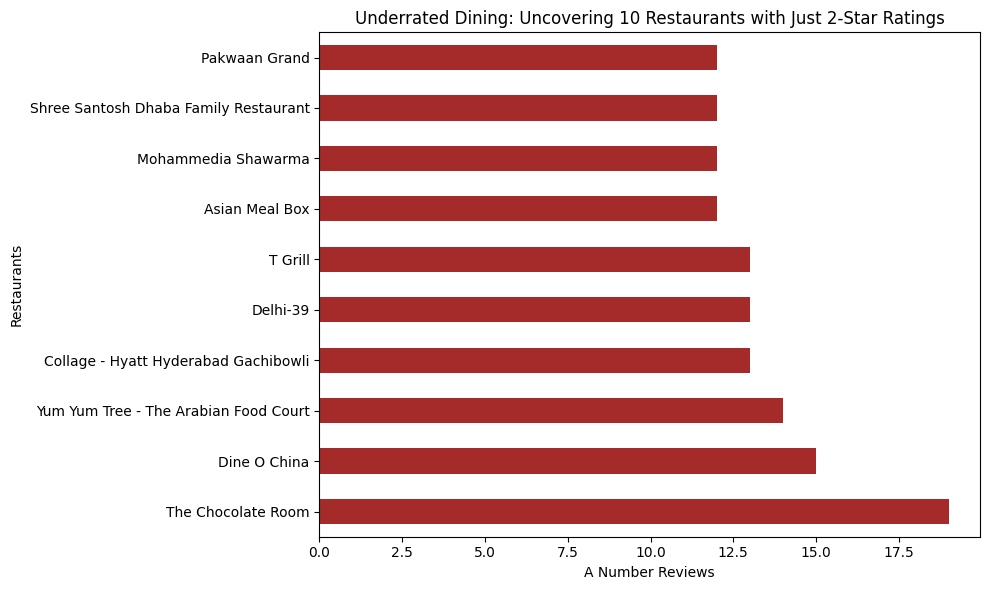

In [ ]:
plt.figure(figsize=(10, 6))
The2_chrestaurants.plot(kind='barh', color = 'brown' )
plt.title("Underrated Dining: Uncovering 10 Restaurants with Just 2-Star Ratings")
plt.xlabel('A Number Reviews')
plt.ylabel('Restaurants')
plt.tight_layout()

# Shows the chart
plt.show()


In [ ]:
# Find the restaurant having Rating 1-Star
the_restaurants = data[data['Restaurant Rating'] == 1]

# sort by "Rating"
the_restaurants_sorted = the_restaurants.sort_values(by='Restaurant Rating', ascending=True)
therestaurant_count = the_restaurants_sorted['Restaurant'].value_counts()

# Shows the Restaurant
chrestaurants = therestaurant_count.head(10)

print(chrestaurants)

Hotel Zara Hi-Fi                         53
Asian Meal Box                           40
Domino's Pizza                           39
Behrouz Biryani                          38
Mohammedia Shawarma                      36
KFC                                      36
Shree Santosh Dhaba Family Restaurant    35
Desi Bytes                               34
Pakwaan Grand                            34
Mathura Vilas                            34
Name: Restaurant, dtype: int64


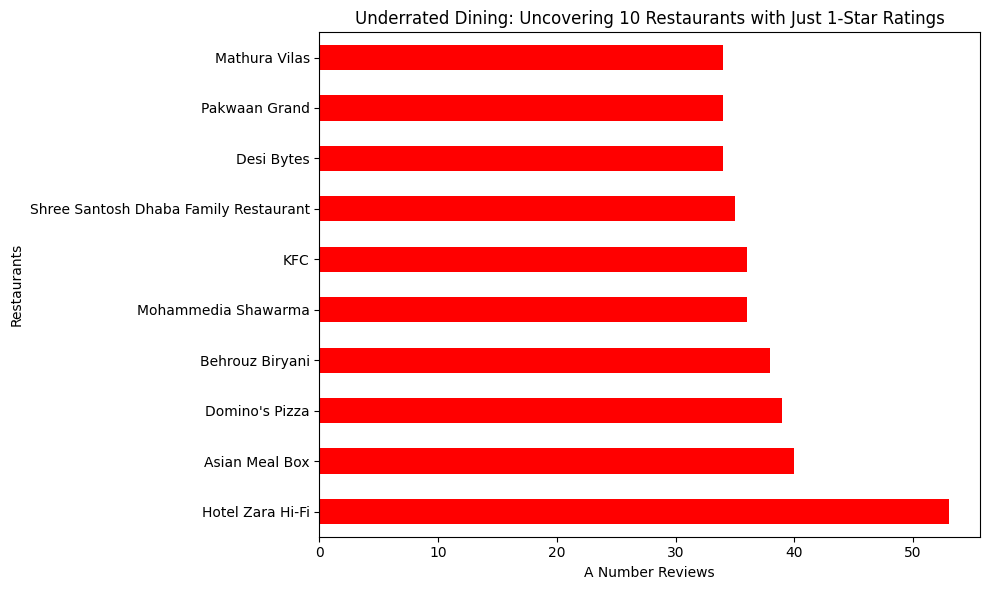

In [ ]:
plt.figure(figsize=(10, 6))
chrestaurants.plot(kind='barh', color = 'red')
plt.title("Underrated Dining: Uncovering 10 Restaurants with Just 1-Star Ratings")
plt.xlabel('A Number Reviews')
plt.ylabel('Restaurants')
plt.tight_layout()

# Shows the chart
plt.show()


# Data Pre-Processing for Sentiment Models

Sentiment Analysis is the most common text classification tool that analyses an incoming message and tells whether the underlying sentiment positive or negative. Understanding people’s emotions is essential for businesses since customers are able to express their thoughts and feelings more openly than ever before. It is quite hard for a human to go through each single line and identify the emotion being the user experience and analyzing customer feedback.

In [22]:
# Create a copy of the dataset with only columns Review and Rating
data_new = data[['Review','Restaurant Rating']].copy()

In [23]:
# Rename columns
data_new = data_new.rename(columns={'Review': 'text', 'Restaurant Rating': 'label'})
data_new

,text,label
0,"The ambience was good, food was quite good . h...",5
1,Ambience is too good for a pleasant evening. S...,5
2,A must try.. great food great ambience. Thnx f...,5
3,Soumen das and Arun was a great guy. Only beca...,5
4,Food is good.we ordered Kodi drumsticks and ba...,5
...,...,...
9995,Madhumathi Mahajan Well to start with nice cou...,3
9996,This place has never disappointed us.. The foo...,4
9997,"Bad rating is mainly because of ""Chicken Bone ...",1
9998,I personally love and prefer Chinese Food. Had...,4


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(data_new, *['label'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(data_new, *['labels'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(data_new, *['tweet_length'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(data_new, *['label'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(data_new, *['labels'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(data_new, *['tweet_length'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(data_new, *[[['label', 'labels'], ['labels', 'tweet_length']]], **{})
chart

In [24]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9964 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    9964 non-null   object
 1   label   9964 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 233.5+ KB


### Tag Word Classified by Rating

RATING #5 Star

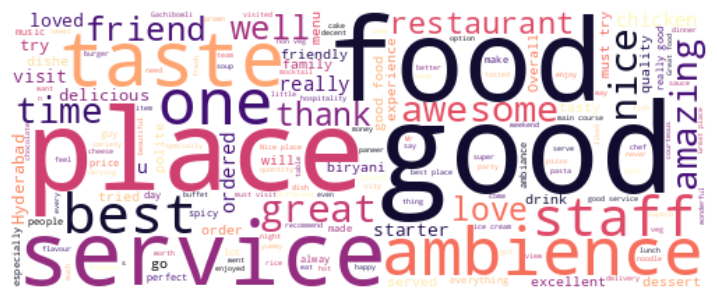

In [ ]:
# Filter the data for reviews with a rating of 5
reviews_with_rating_5 = data[data['Restaurant Rating'] == 5]

# Join all the text from the filtered reviews
all_text_review = ' '.join(reviews_with_rating_5['Review'])

# Create the WordCloud
wc_text_review = WordCloud(
    width=500,
    height=200,
    stopwords=STOPWORDS,
    background_color='white',
    colormap='magma',
    random_state=42
).generate(all_text_review)

# Display the WordCloud
plt.figure(figsize=(9, 5))
plt.imshow(wc_text_review, interpolation='bilinear')
plt.axis('off')
plt.show()

RATING #4 Star

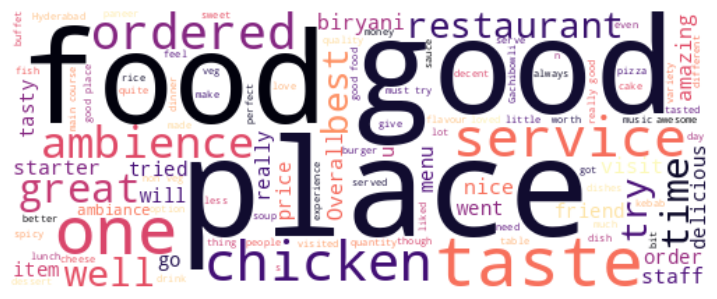

In [ ]:
# Filter the data for reviews with a rating of 4
reviews_with_rating_4 = data[data['Restaurant Rating'] == 4]

# Join all the text from the filtered reviews
all_text_review = ' '.join(reviews_with_rating_4['Review'])

# Create the WordCloud
wc_text_review = WordCloud(
    width=500,
    height=200,
    stopwords=STOPWORDS,
    background_color='white',
    colormap='magma',
    random_state=42
).generate(all_text_review)

# Display the WordCloud
plt.figure(figsize=(9, 5))
plt.imshow(wc_text_review, interpolation='bilinear')
plt.axis('off')
plt.show()

RATING #3 Star

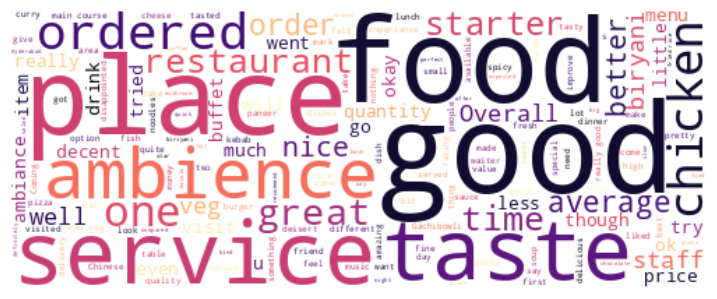

In [ ]:
# Filter the data for reviews with a rating of 3
reviews_with_rating_3 = data[data['Restaurant Rating'] == 3]

# Join all the text from the filtered reviews
all_text_review = ' '.join(reviews_with_rating_3['Review'])

# Create the WordCloud
wc_text_review = WordCloud(
    width=500,
    height=200,
    stopwords=STOPWORDS,
    background_color='white',
    colormap='magma',
    random_state=42
).generate(all_text_review)

# Display the WordCloud
plt.figure(figsize=(9, 5))
plt.imshow(wc_text_review, interpolation='bilinear')
plt.axis('off')
plt.show()

Comment : Rating #3 Star it seems that the review polarized as positive sentiment .

## In fact, rankings on review sites matter so much that 33% of customers won’t eat in restaurants with an online rating lower than 4 stars on TripAdvisor, Google, or Yelp.

In [ ]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

good: 2.76%
place: 1.77%
food: 1.69%
chicken: 0.94%
taste: 0.92%
ordered: 0.75%
service: 0.66%
like: 0.61%
ambience: 0.59%
Food: 0.57%


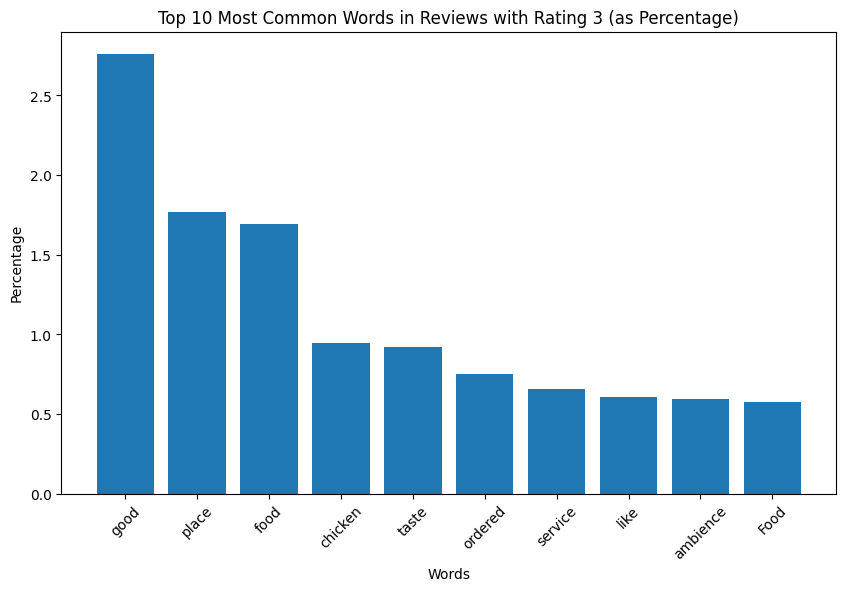

In [ ]:
from collections import Counter

# Filter the data for reviews with a rating of 3
reviews_with_rating_3 = data[data['Restaurant Rating'] == 3]

# Combine all the text from these reviews
all_text_review_3 = ' '.join(reviews_with_rating_3['Review'])

# Tokenize the text into words
words = nltk.word_tokenize(all_text_review_3)

# Remove stopwords (common words like "the," "and," "is," etc. that don't carry much meaning)
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words and word.isalnum()]

# Count the frequency of each word
word_counts = Counter(filtered_words)

# Calculate the total number of words
total_words = len(filtered_words)

# Calculate and display the most common words as percentages
most_common_words = word_counts.most_common(10)
for word, count in most_common_words:
    percentage = (count / total_words) * 100
    print(f'{word}: {percentage:.2f}%')

# Optionally, you can create a bar plot of the most common words as percentages
word_freq_dict = dict(most_common_words)
percentage_freq_dict = {word: (count / total_words) * 100 for word, count in word_freq_dict.items()}

plt.figure(figsize=(10, 6))
plt.bar(percentage_freq_dict.keys(), percentage_freq_dict.values())
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Percentage')
plt.title('Top 10 Most Common Words in Reviews with Rating 3 (as Percentage)')
plt.show()


RATING #2 Star

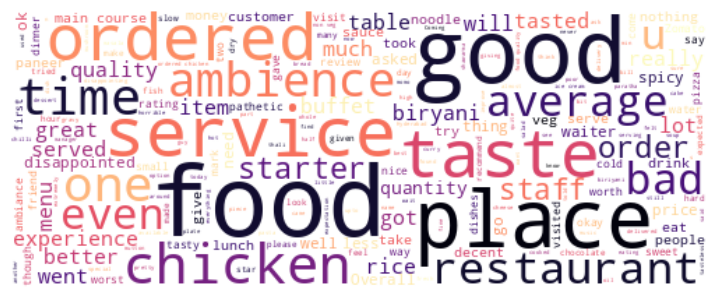

In [ ]:
# Filter the data for reviews with a rating of 2
reviews_with_rating_2 = data[data['Restaurant Rating'] == 2]

# Join all the text from the filtered reviews
all_text_review = ' '.join(reviews_with_rating_2['Review'])

# Create the WordCloud
wc_text_review = WordCloud(
    width=500,
    height=200,
    stopwords=STOPWORDS,
    background_color='white',
    colormap='magma',
    random_state=42
).generate(all_text_review)

# Display the WordCloud
plt.figure(figsize=(9, 5))
plt.imshow(wc_text_review, interpolation='bilinear')
plt.axis('off')
plt.show()

food: 2.05%
good: 1.99%
place: 1.51%
taste: 0.99%
ordered: 0.96%
chicken: 0.88%
service: 0.83%
like: 0.68%
time: 0.64%
bad: 0.59%


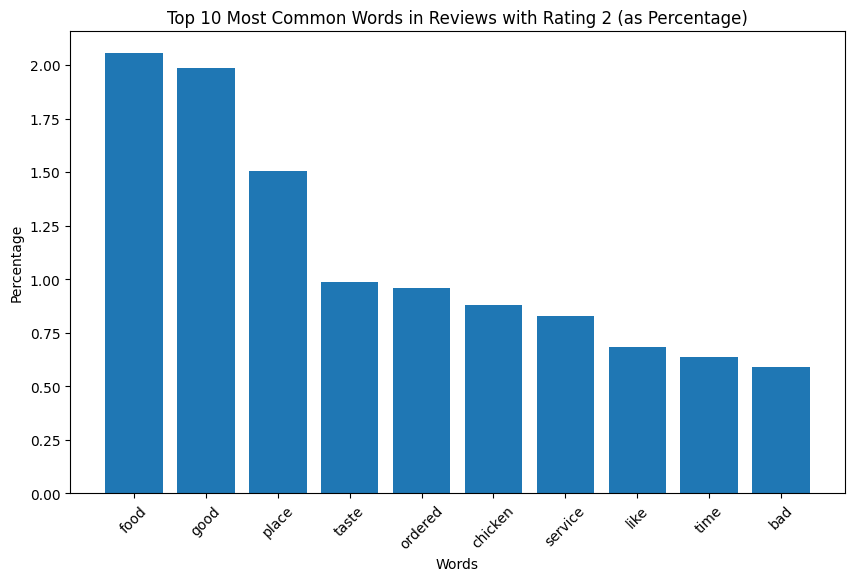

In [ ]:
# Filter the data for reviews with a rating of 2
reviews_with_rating_2 = data[data['Restaurant Rating'] == 2]

# Combine all the text from these reviews
all_text_review_2 = ' '.join(reviews_with_rating_2['Review'])

# Tokenize the text into words
words = nltk.word_tokenize(all_text_review_2)

# Remove stopwords (common words like "the," "and," "is," etc. that don't carry much meaning)
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words and word.isalnum()]

# Count the frequency of each word
word_counts = Counter(filtered_words)

# Calculate the total number of words
total_words = len(filtered_words)

# Calculate and display the most common words as percentages
most_common_words = word_counts.most_common(10)
for word, count in most_common_words:
    percentage = (count / total_words) * 100
    print(f'{word}: {percentage:.2f}%')

# Optionally, you can create a bar plot of the most common words as percentages
word_freq_dict = dict(most_common_words)
percentage_freq_dict = {word: (count / total_words) * 100 for word, count in word_freq_dict.items()}

plt.figure(figsize=(10, 6))
plt.bar(percentage_freq_dict.keys(), percentage_freq_dict.values())
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Percentage')
plt.title('Top 10 Most Common Words in Reviews with Rating 2 (as Percentage)')
plt.show()

RATING #1 Star

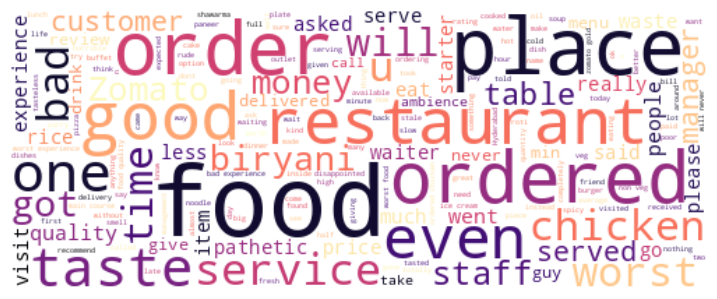

In [ ]:
# Filter the data for reviews with a rating of 1
reviews_with_rating_1 = data[data['Restaurant Rating'] == 1]

# Join all the text from the filtered reviews
all_text_review = ' '.join(reviews_with_rating_1['Review'])

# Create the WordCloud
wc_text_review = WordCloud(
    width=500,
    height=200,
    stopwords=STOPWORDS,
    background_color='white',
    colormap='magma',
    random_state=42
).generate(all_text_review)

# Display the WordCloud
plt.figure(figsize=(9, 5))
plt.imshow(wc_text_review, interpolation='bilinear')
plt.axis('off')
plt.show()

food: 1.98%
place: 1.26%
order: 1.16%
ordered: 1.04%
good: 0.94%
chicken: 0.90%
bad: 0.89%
service: 0.86%
restaurant: 0.81%
worst: 0.77%


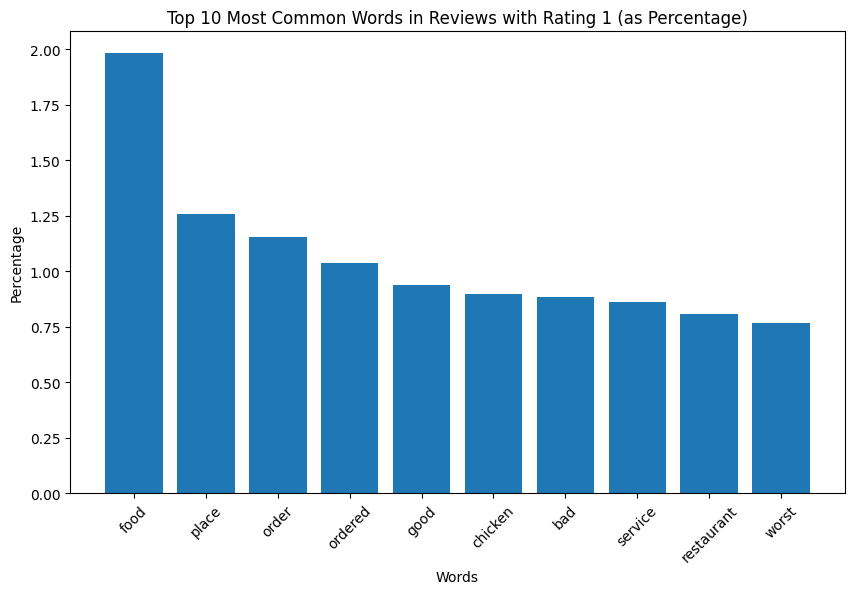

In [ ]:
# Filter the data for reviews with a rating of 1
reviews_with_rating_1 = data[data['Restaurant Rating'] == 1]

# Combine all the text from these reviews
all_text_review_1 = ' '.join(reviews_with_rating_1['Review'])

# Tokenize the text into words
words = nltk.word_tokenize(all_text_review_1)

# Remove stopwords (common words like "the," "and," "is," etc. that don't carry much meaning)
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words and word.isalnum()]

# Count the frequency of each word
word_counts = Counter(filtered_words)

# Calculate the total number of words
total_words = len(filtered_words)

# Calculate and display the most common words as percentages
most_common_words = word_counts.most_common(10)
for word, count in most_common_words:
    percentage = (count / total_words) * 100
    print(f'{word}: {percentage:.2f}%')

# Optionally, you can create a bar plot of the most common words as percentages
word_freq_dict = dict(most_common_words)
percentage_freq_dict = {word: (count / total_words) * 100 for word, count in word_freq_dict.items()}

plt.figure(figsize=(10, 6))
plt.bar(percentage_freq_dict.keys(), percentage_freq_dict.values())
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Percentage')
plt.title('Top 10 Most Common Words in Reviews with Rating 1 (as Percentage)')
plt.show()

## Glowing reviews and high ratings are helping you build brand trust, but at the same time, customer feedback is crucial for improving your service and stepping up your restaurant management game.

## Labeling the Sentiment Analysis

In [25]:
# This function returns sentiment value based on:
# label < 3.0 -> Negative

def convert_sentiment(rating):

    if rating['label'] < 3.0:
        return 'Negative'
    else:
        return 'Positive'

In [26]:
# Applying the function in our dataset
data_new['label'] = data_new.apply(convert_sentiment, axis=1)
data_new

,text,label
0,"The ambience was good, food was quite good . h...",Positive
1,Ambience is too good for a pleasant evening. S...,Positive
2,A must try.. great food great ambience. Thnx f...,Positive
3,Soumen das and Arun was a great guy. Only beca...,Positive
4,Food is good.we ordered Kodi drumsticks and ba...,Positive
...,...,...
9995,Madhumathi Mahajan Well to start with nice cou...,Positive
9996,This place has never disappointed us.. The foo...,Positive
9997,"Bad rating is mainly because of ""Chicken Bone ...",Negative
9998,I personally love and prefer Chinese Food. Had...,Positive


## Data Imbalance : Based on research, NLP DataSET generally imbalance because the business have a tendency to favor positive sentiment than the negative sentiment.

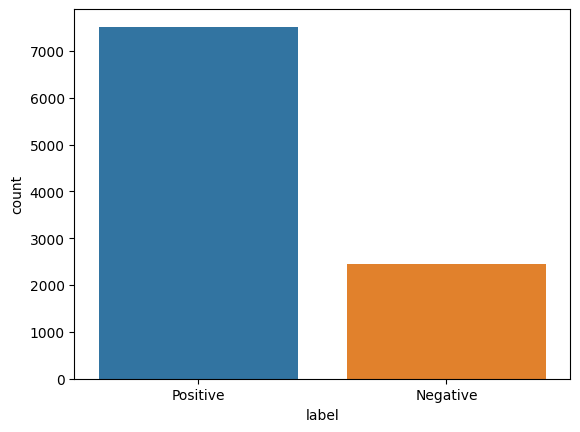

In [27]:
sns.countplot(x ='label',
              data = data_new)

plt.show()

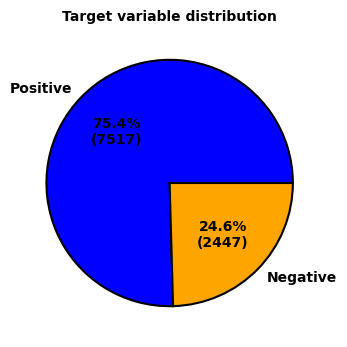

In [ ]:
# Visualization of the objective variable.

df_pct = data_new['label'].value_counts().to_frame().rename(index = { 'Negative':'Negative', 'Positive':'Positive'})

labels = df_pct.index.to_list()
values = df_pct.iloc[:,0]


fig,axes = plt.subplots(figsize = (9,4))

def autopct_fun(abs_values):
    gen = iter(abs_values)
    return lambda pct: f"{pct:.1f}%\n({next(gen)})"


axes.pie(x = values, labels = labels, autopct = autopct_fun(values), colors = ['blue','orange'],
            wedgeprops = {'linewidth':1.5, 'edgecolor':'black'},
            textprops = {'fontsize':10, 'fontweight':'bold'})
axes.set_title('Target variable distribution', fontsize = 10, fontweight = 'bold', color = 'black')

fig.show()

In [ ]:
data_new['label'].value_counts()

1    7517
0    2447
Name: label, dtype: int64

## Customer Satisfaction Index

Customer satisfaction = (number of satisfied and very satisfied customers ÷ total number of responses) x 100%

In [ ]:
# Calculate CSAT percentage
csat = (7517 / 9964) * 100

# Print the CSAT percentage
print(f'CSAT: {csat:.2f}%')

CSAT: 75.44%


## Understand the Sentiment Positive Or Negative

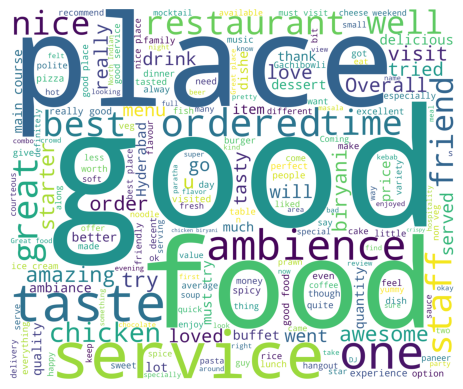

In [ ]:
# WordCloud - Sentiment Positive

data1 = data_new[data_new['label']== 'Positive']
words = ' '.join(data1['text'].astype(str))
cleaned_word = ' '.join([word for word in words.split() if not word.startswith('@')])

wordcloud = WordCloud(background_color = 'white',
                      stopwords=STOPWORDS,
                      width=3000,
                      height=2500).generate(''.join(cleaned_word))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

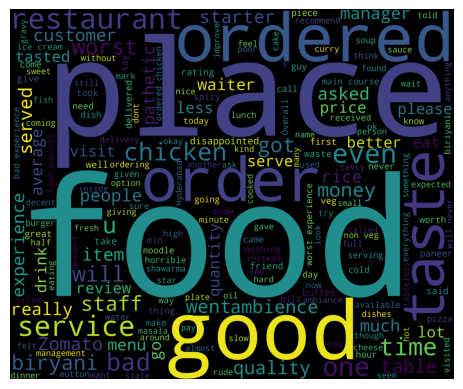

In [ ]:
# WordCloud - Sentiment Negative

data2 = data_new[data_new['label']=='Negative']
words = ' '.join(data2['text'].astype(str))
cleaned_word = ' '.join([word for word in words.split() if not word.startswith('@')])

wordcloud = WordCloud(background_color='black',
                      stopwords=STOPWORDS,
                      width=3000,
                      height=2500).generate(''.join(cleaned_word))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Pre-process Text

Text Preprocessing is traditionally an important step for Natural Language Processing (NLP) tasks. It transforms text into a more digestible form so that machine learning algorithms can perform better.

## The Preprocessing steps taken are:

1. Lower Casing: Each text is converted to lowercase.

2. Replacing Emojis: Replace emojis by using a pre-defined dictionary containing emojis along with their meaning. (eg: ":)" to "EMOJIsmile").

3. Replacing Usernames: Replace @Usernames with word "USER". (eg: "@Kaggle" to "USER").

4. Removing Non-Alphabets: Replacing characters except Digits and Alphabets with a space.
5. Removing Consecutive letters: 3 or more consecutive letters are replaced by 2 letters. (eg: "Heyyyy" to "Heyy")

6. Removing Short Words: Words with length less than 2 are removed.

7. Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")

8. Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g: “Great” to “Good”)

In [28]:
def tweet_to_words(tweet):
    letters_only = re.sub('^[a-zA-Z]',' ',tweet)
    words = letters_only.lower().split()
    stops = set(stopwords.words('english'))
    meaningful_word = [w for w in words if w not in stops]
    return ' '.join(meaningful_word)

In [29]:
def tweet_len(tweet):
    letters_only = re.sub('^[a-zA-Z]',' ',tweet)
    words = letters_only.lower().split()
    stops = set(stopwords.words('english'))
    meaningful_word = [w for w in words if w not in stops]
    return (len(meaningful_word))

## Encoding target variable-sentiment

Let's encode our target variable with Label encoder.

In [30]:
# calling the label encoder function
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode labels in column 'label'.
data_new['label']= label_encoder.fit_transform(data_new['label'])

data_new['label'].unique()

array([1, 0])

## Train & Test

Splitting the Data
The Preprocessed Data is divided into 2 sets of data:

- It assigns 80% of the data to the 'train_data' DataFrame and
- 20% to the 'test_data' DataFrame.

The 'random_state' parameter is set to ensure reproducibility.

In [31]:
data_new['labels'] = data_new['label'].apply(lambda x:0 if x== 0 else 1)
data_new['clean_tweet'] = data_new['text'].astype(str).apply(lambda x:tweet_to_words(x))
data_new['tweet_length'] = data_new['text'].astype(str).apply(lambda x:tweet_len(x))
train_data, test_data = train_test_split(data_new,test_size=0.2,random_state=123)

In [32]:
train_clean_tweet = []
for tweet in train_data['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet = []
for tweet in test_data['clean_tweet']:
    test_clean_tweet.append(tweet)

## Make sure the dataset already splitted

In [33]:
train_data.shape

(7971, 5)

In [34]:
test_data.shape

(1993, 5)

TF-IDF Vectoriser converts a collection of raw documents to a matrix of TF-IDF features. The Vectoriser is usually trained on only the X_train dataset.

ngram_range is the range of number of words in a sequence. [e.g "very expensive" is a 2-gram that is considered as an extra feature separately from "very" and "expensive" when you have a n-gram range of (1,2)]

max_features specifies the number of features to consider. [Ordered by feature frequency across the corpus].

Tranforming the dataset
Transforming the train_features and test_features dataset into matrix of TF-IDF Features by using the TF-IDF Vectoriser. This datasets will be used to train the model and test against it.

In [35]:
## TF-IDF Vectoriser converts
vectoriser = TfidfVectorizer(analyzer='word', ngram_range=(1,2), max_features=500000)

## Tranforming the dataset
train_features = vectoriser.fit_transform(train_clean_tweet)
test_features = vectoriser.transform(test_clean_tweet)

## Aim of this project

The main goal of this project is to develop a machine-learning classification model that can clasify sentiment analysis. The dataset used comes from the GITHUB & Kaggle website, which contains the results of NLP  - Restaurant Sentiment Analysis. In addition, the target of this project is to reduce a wrong classification based on reviews are truly positive or negative successfully being identified by machine learning models.


## Creating and Evaluating Models

In [36]:
## Classifiers

Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),]

The use of .toarray() is typically required when you have data generated from the text vectorization process (such as what's done by TfidfVectorizer or CountVectorizer in scikit-learn) and you want to convert it from a sparse representation to a dense representation in the form of a NumPy array.

In [ ]:
dense_features = train_features.toarray()
dense_test = test_features.toarray()

# Initialize lists to store performance metrics
Precision = []
Recall = []
F1_Score = []
Model = []

for classifier in Classifiers:
    try:
        # Train the classifier
        fit = classifier.fit(train_features, train_data['label'])

        # Make predictions
        pred_train = fit.predict(dense_features)
        pred_test = fit.predict(dense_test)
    except Exception:
        # If the classifier doesn't accept sparse matrices, use dense features
        fit = classifier.fit(dense_features, train_data['label'])
        pred_train = fit.predict(dense_features)
        pred_test = fit.predict(dense_test)

    # Calculate precision, recall, and F1-score
    precision_train = precision_score(pred_train, train_data['label'])
    precision_test = precision_score(pred_test, test_data['label'])

    recall_train = recall_score(pred_train, train_data['label'])
    recall_test = recall_score(pred_test, test_data['label'])

    f1_train = f1_score(pred_train, train_data['label'])
    f1_test = f1_score(pred_test, test_data['label'])

    # Append metrics to lists
    Precision.append((precision_train, precision_test))
    Recall.append((recall_train, recall_test))
    F1_Score.append((f1_train, f1_test))
    Model.append(classifier.__class__.__name__)

    # Print the metrics
    print(f'{classifier.__class__.__name__} Metrics:')
    print(f'Precision Train: {precision_train:.4f}')
    print(f'Precision Test: {precision_test:.4f}')

    print(f'Recall Train: {recall_train:.4f}')
    print(f'Recall Test: {recall_test:.4f}')

    print(f'F1-Score Train: {f1_train:.4f}')
    print(f'F1-Score Test: {f1_test:.4f}')
    print()

LogisticRegression Metrics:
Precision Train: 1.0000
Precision Test: 1.0000
Recall Train: 0.7536
Recall Test: 0.7577
F1-Score Train: 0.8595
F1-Score Test: 0.8621

KNeighborsClassifier Metrics:
Precision Train: 0.9993
Precision Test: 0.9974
Recall Train: 0.7614
Recall Test: 0.7641
F1-Score Train: 0.8643
F1-Score Test: 0.8653

DecisionTreeClassifier Metrics:
Precision Train: 0.9992
Precision Test: 0.8874
Recall Train: 0.9972
Recall Test: 0.8827
F1-Score Train: 0.9982
F1-Score Test: 0.8851

RandomForestClassifier Metrics:
Precision Train: 1.0000
Precision Test: 0.9795
Recall Train: 0.9964
Recall Test: 0.8835
F1-Score Train: 0.9982
F1-Score Test: 0.9290



## Cross Validation - Before Oversampling with SMOTE
Cross-validation (K-fold cross-validation) is typically performed before addressing class : being understand how well the classifier performs on the data as it is, without any oversampling or imbalance handling.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
score_lr = cross_val_score(LogisticRegression(solver='liblinear',max_iter=200), dense_features, train_data['label'], cv=5, scoring='f1')
print(score_lr)
print("Avg :",np.average(score_lr))

[0.91153846 0.91657055 0.91762895 0.91615385 0.91384615]
Avg : 0.9151475913339151


when try to perfoming the RandomForestClassifier not runing well.

In [ ]:
score_rf = cross_val_score(RandomForestClassifier(n_estimators=200), dense_features, train_data['label'], cv=3, scoring='f1', n_jobs=1)
print(score_rf)
print("Avg :",np.average(score_rf))

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming you have already identified the Random Forest classifier with the highest precision
# You can replace this with the actual best classifier
best_classifier = RandomForestClassifier(n_estimators=200)
other_classifier = DecisionTreeClassifier()

# Train the best classifier on your training data
best_classifier.fit(dense_features, train_data['label'])
other_classifier.fit(dense_features, train_data['label'])

# Make predictions on the testing data
predictions = best_classifier.predict(dense_features)
other_predictions = other_classifier.predict(dense_features)

# Create a confusion matrix
confusion = confusion_matrix(train_data['label'], predictions)
confusion_x = confusion_matrix(train_data['label'], other_predictions)

# Print the confusion matrix
print("Confusion Matrix 1:")
print(confusion)

print("Confusion Matrix 2:")
print(confusion_x)


Confusion Matrix 1:
[[1942   22]
 [   0 6007]]
Confusion Matrix 2:
[[1947   17]
 [   5 6002]]


## Handling Data Imbalance

In [37]:
data_new['label'].value_counts()

1    7517
0    2447
Name: label, dtype: int64

### Extracting

In [38]:
#Extracting 'reviews' for processing

review_features = data_new[['text']].reset_index(drop=True)
review_features.head(10)

,text
0,"The ambience was good, food was quite good . h..."
1,Ambience is too good for a pleasant evening. S...
2,A must try.. great food great ambience. Thnx f...
3,Soumen das and Arun was a great guy. Only beca...
4,Food is good.we ordered Kodi drumsticks and ba...
5,"Ambiance is good, service is good, food is aPr..."
6,"Its a very nice place, ambience is different, ..."
7,Well after reading so many reviews finally vis...
8,"Excellent food , specially if you like spicy f..."
9,Came for the birthday treat of a close friend....


Handling Imbalance target feature-SMOTE
In our target feature, we noticed that we got a lot of positive sentiments compared to negative. So it is crucial to balanced the classes in such situation. Here I use SMOTE(Synthetic Minority Oversampling Technique) to balance out the imbalanced dataset problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them.

SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

In [39]:
from collections import Counter
from imblearn.over_sampling import SMOTE

# Check the class distribution in your training data
print(f'Original dataset shape: {Counter(data_new["label"])}')

# Instantiate the SMOTE resampler
smote = SMOTE(random_state=42)

# Apply SMOTE to oversample the minority class (assuming binary classification)
train_features_resampled, train_labels_resampled = smote.fit_resample(train_features, train_data['label'])

# Check the class distribution after oversampling
print(f'Resampled dataset shape: {Counter(train_labels_resampled)}')

Original dataset shape: Counter({1: 7517, 0: 2447})
Resampled dataset shape: Counter({1: 6007, 0: 6007})


## Creating and Evaluating Models

In [ ]:
# Initialize lists to store performance metrics
Accuracy = []
Precision = []
Recall = []
F1_Score = []
Model = []

for classifier in Classifiers:
    try:
        # Train the classifier
        fit = classifier.fit(train_features_resampled, train_labels_resampled)

        # Make predictions
        pred = fit.predict(train_features_resampled)  # Use the same data for prediction that you used for training

    except Exception:
        # If the classifier doesn't accept sparse matrices, use dense features
        fit = classifier.fit(train_features_resampled, train_labels_resampled)
        pred = fit.predict(train_features_resampled)  # Use the same data for prediction that you used for training

    # Calculate precision, recall, and F1-score
    accuracy = accuracy_score(train_labels_resampled, pred)
    precision = precision_score(train_labels_resampled, pred)
    recall = recall_score(train_labels_resampled, pred)
    f1 = f1_score(train_labels_resampled, pred)

    # Append metrics to lists
    Accuracy.append(accuracy)
    Precision.append(precision)
    Recall.append(recall)
    F1_Score.append(f1)
    Model.append(classifier.__class__.__name__)

    # Print the metrics
    print(f'{classifier.__class__.__name__} Metrics:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-Score: {f1:.4f}')
    print()

LogisticRegression Metrics:
Accuracy: 0.7834
Precision: 0.7049
Recall: 0.9750
F1-Score: 0.8182

KNeighborsClassifier Metrics:
Accuracy: 0.5546
Precision: 0.8710
Recall: 0.1282
F1-Score: 0.2235

DecisionTreeClassifier Metrics:
Accuracy: 0.9978
Precision: 0.9972
Recall: 0.9985
F1-Score: 0.9978

RandomForestClassifier Metrics:
Accuracy: 0.9978
Precision: 0.9970
Recall: 0.9987
F1-Score: 0.9978



## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid,
                                   n_iter=100, scoring='f1', cv=5, random_state=42, n_jobs=-1)

# Perform the Randomized Search
random_search.fit(train_features_resampled, train_labels_resampled)

# Get the best hyperparameters
best_params = random_search.best_params_

# Instantiate a Random Forest classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)

# Train the best classifier on the resampled training data
best_rf_classifier.fit(train_features_resampled, train_labels_resampled)

# Make predictions on the test data
pred = best_rf_classifier.predict(train_features_resampled)

# Calculate precision, recall, and F1-score
accuracy = accuracy_score(train_labels_resampled, pred)
precision = precision_score(train_labels_resampled, pred)
recall = recall_score(train_labels_resampled, pred)
f1 = f1_score(train_labels_resampled, pred)

# Print the best hyperparameters and performance metrics
print(f'Best Hyperparameters: {best_params}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
